### NAME:徐騫諒 NO:711133112

## This job will be divided into two parts.
- First, introduce some classification theories.
- Second, implement with laboratory.

### <font color=green>Introduce of Support vector machine</font>
Sometimes we faced with non-linear class boundaries,so we can't use support vector classifier.Then we exten support vector classifier to support vector machine(SVM).This is a technique of enlarging the feature space in a specific way, using kernels.We want to use SVM to find the hyperplane that can classify different labels (y).The hyperplane can be writen :$$H:W^T \phi(x)+b=0$$ where,w is that matrix representing the plane's parameters also the coefficient of x where x is the input data. b represents the intercept of the hyperplane.And we should optime to find w,  $W^*=\mathop{argmax}\limits_{W}\frac{1}{\|w\|}[\mathop{min}\limits_{n}y_{n}[W^T \phi(x)+b] ]$.

$\phi(\cdot)$ is a kernels function,it can enlarge original data space to higher dimenesion.Some common kernels :
- Linear kernel:$\phi(x,x^*)=x\cdot x'$.It usually solve binary category,because this kernel transform orginal data to 2-dimension.But it present poorly if we have more than two categorys.
- Polynomial kernel:$\phi(x,x^*)=(1+\sum_{j=1}^{p}x_{ij}x^*_{ij})^d$,using the parameter 'd' can enlarge any dimenesion which depeond on our category.This kernel suit for some of condition that we can't classify on low dimenesion.In the same time,the parameter 'd' could determine by <font color=red>cross validation.</font>
- Radial Basis Function:$\phi(x,x^*)=\exp(-\gamma \sum_{j=1}^{p}(x_{ij}-x^{*}_{ij})^2),\gamma$ is a posite constant.The RBF kernel maps samples to an infinite-dimensional space, making it possible to find a linear boundary that separates the data with high accuracy in this space. The kernel trick is used to compute the inner products in the higher-dimensional space without actually computing the coordinates of the samples in that space.


### <font color=green>Introduce of some neural network alogrithms</font>
The MLP algorithm is particularly useful for classification tasks, where the goal is to predict a discrete label based on a set of input features. The MLP consists of multiple layers of neurons, including an input layer, one or more hidden layers, and an output layer. Each neuron in the MLP is connected to neurons in the adjacent layers, and the weights of these connections are learned during the training process.There are some famous algorithm in MLPClassifier.
- LBFGS（Limited-memory Broyden-Fletcher-Goldfarb-Shanno）:$$x_{k+1}=x_{k}-\alpha_{k}H_{k}g_{k} $$
where $\alpha_k$ is the step length, $g_k$ is the gradient, and $H_k$ is the inverse estimate of the Hessian matrix calculated from the differences between past gradients and positions.
The basic idea of LBFGS is to restrict the storage of past gradients and position differences in BFGS, thereby avoiding the need to store large matrices.<font color=blue> This solver is a good choice for small datasets, but may have difficulty scaling to larger datasets.</font>
- Stochastic Gradient Descent(SGD):$$w_{t+1} = w_t - \eta \nabla Q_i(w_t, x_i, y_i)$$
 where $w_t$ represents the weight at the $t$-th iteration, $\eta$ is the learning rate, and $\nabla Q_i(w_t, x_i, y_i)$ is the gradient of the loss function, usually calculated based on a single sample $i$.SGD updates the parameters of the model in each iteration by taking small steps in the direction of the negative gradient of the objective function evaluated on a single sample or a mini-batch of samples from the training data.<font color=blue> This solver is often used for large datasets, but may require more hyperparameter tuning than other solvers.</font>
 - Adaptive Moment Estimation(ADAM):$$w_{t+1}=w_{t}-\frac{\eta}{\sqrt{\hat{v}_t}+\epsilon}\hat{m}_t$$
 where $w_t$ represents the weights in the $t^{th}$ iteration, $\eta$ represents the learning rate, $\hat{m}_t$ and $\hat{v}_t$ are the bias-corrected estimates of the first and second moments of the gradients, respectively, and $\epsilon$ is a small number, typically set to $10^{-8}$.The Adam algorithm is based on the first-order moment estimate of gradients, also known as momentum, and the second-order moment estimate of gradients, which is the exponentially weighted average of the square of gradients. Specifically, it maintains a momentum vector $m_t$ and a exponentially weighted average vector of squared gradients $v_t$, and uses them to update the weights. <font color=blue> It has been shown to work well on a wide range of problems, and is often the default choice for MLPClassifier.</font>

### <font color=green>Introduce algorithms in LogisticRegression</font>
- LBFGS:we had introduced before.
- newton-cg(Newton-Conjugate-Gradient method):$$w_{k+1}=w_k+\alpha_k d_k$$
Here, $w_k$ is the parameter vector at the $k$-th iteration, $\alpha_k$ is the step size (learning rate), and $d_k$ is the computed descent direction. The formula for calculating $d_k$ is as follows:$$d_k=-(\nabla^2 Q(w_k))^{-1} \nabla Q(w_k)$$ 
Here, $\nabla Q(w_k)$ is the gradient of the loss function, and $\nabla^2 Q(w_k)$ is the Hessian matrix of the loss function. In the Newton-CG algorithm, to avoid computing the inverse of the Hessian matrix, the quasi-Newton method of BFGS or L-BFGS is generally used to approximate the inverse matrix and obtain the descent direction $d_k$.<font color=blue>However, due to the need to calculate the inverse matrix of the second-order derivative matrix, it may be relatively slow when dealing with large-scale datasets,only applicable for binary classification problems and does not support multi-class classification.</font>
- Liblinear(A Library for Large Linear Classification):$$min_{w}\frac{1}{2}||w||^2+C\sum_{i=1}^{n}max(0,1-y_i(w^Tx_i+b))$$ 
where $w$ is the parameter vector, $b$ is the bias term, $C$ is the regularization parameter, and $y_i$ and $x_i$ represent the label and feature vector of the $i$-th sample, respectively. <font color=blue>Cause it supports both L1 and L2 regularization, can handle a large number of samples and high-dimensional features, and provides multiple optimization algorithms.</font>

### This part, I will tell some<font color=#9999FF> common functions </font> in our work.
- accuracy_score( ) : this function will return the fraction of correctly classified samples.
- score( ) : this function will return the mean accuracy on the given test data and labels.
- classification_report( ):this function will build a text report showing the main classification metrics.  
Under the text report,there ars some important scores for classify.


    - support :represent sample labels in reality.
    - recall :caculate how many predictions for $x$ are actually in the $x$ class.
    - precision :caculate how many samples predicted as x were correctly predicted as x.
    - f1-score : 2 * precision * recall /(precision+recall)
    - macro avg :(sum of rach precision)/(num of labels)
    - weighted avg :use support as weight to caculate weighted mean.
 

## Laboratory

### Import Packages 

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA    
from sklearn.svm import SVC,LinearSVC,LinearSVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Import Data

In [67]:
df = pd.read_excel('/Users/liang/Documents/NTPU/淺度機器學習/資料集/Wine.xlsx')
X = np.array(df.iloc[:, :-1]) # drop the last variable(y) 
y = np.array(df.iloc[:, -1])

In [49]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Split data into training and testing data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)#每次執行的結果會不一樣

## Standardize data

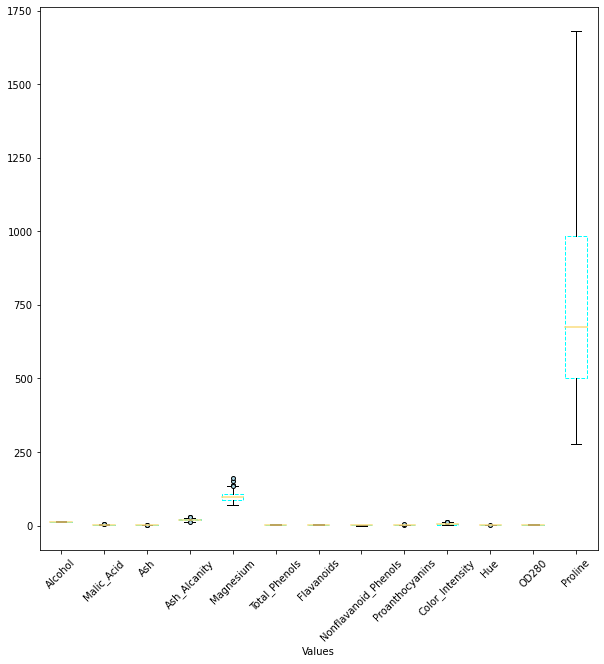

In [70]:
variables = df.columns
df=np.array(df)
fig, ax = plt.subplots(figsize=(10, 10))
boxprops = dict(linestyle='--', linewidth=1, color='#00FFFF')#darkgoldenrod
medianprops = dict(linestyle='-', linewidth=1.5, color='#FBDD7E')
flierprops = dict(marker='o', markerfacecolor='#ADD8E6',
                  markersize=4, linestyle='none')
ax.boxplot(df[:, 0:13], boxprops=boxprops,
           flierprops=flierprops, labels=variables[0:13],medianprops=medianprops, vert=True)
ax.set_xlabel('Values')
plt.xticks(rotation=45) 
plt.show()

<sol\>We can see that ranges of each variable are significant different.So we decide to standard orginal data.

In [52]:
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

## Observe the interesting variable(Customer_Segment) that we want to classify.

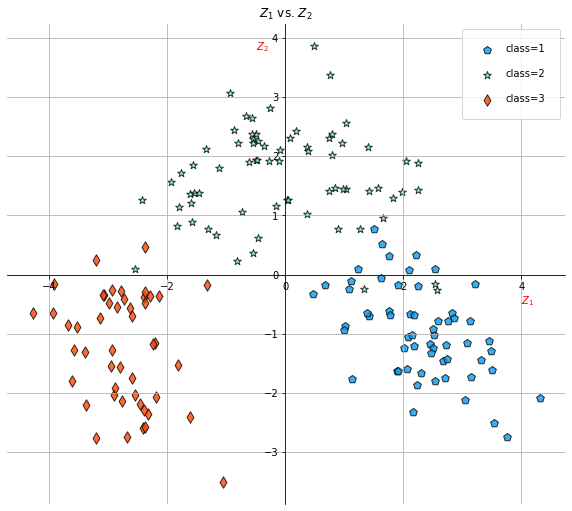

In [53]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(df)
# Apply transform to dataset.
ratings_ = scaler.transform(df)
Sx = np.cov(ratings_[:, 0:13].T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]  
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings_[:, 0:13].T
pca_fit = PCA().fit_transform(ratings_[:, 0:13])
fig, ax = plt.subplots(1, figsize=(10, 10), squeeze=False)
colors = ['#069AF3', '#7FFFD4', '#FF4500']
df = pd.DataFrame(df)
labels = df.iloc[:, -1].unique()
markers = ['p', '*', 'd']
for i, label in enumerate(labels):
    mask = df.iloc[:, -1] == label  
    ax[0][0].scatter(pca_fit[mask, 0], pca_fit[mask, 1], c=colors[i], label="class={}".format(
        i+1), alpha=0.8, edgecolors='black', marker=markers[i], s=65)
    ax[0][0].set_aspect(1)
    ax[0][0].spines['left'].set_position(('data', 0))
    ax[0][0].spines['bottom'].set_position(('data', 0))
    ax[0][0].spines['top'].set_visible(False)
    ax[0][0].spines['right'].set_visible(False)  
    ax[0][0].legend(borderpad=1.5, labelspacing=1.5)
ax[0][0].grid()
ax[0][0].text(4, -0.5, '$Z_1$', color='r')
ax[0][0].text(-0.5, 3.8, '$Z_2$', color='r')
plt.title('$Z_1$ vs. $Z_2$')
plt.show()


<sol\>We can't easily use a line to classify three groups.

## use orginal data to train the logistic regression model

In [72]:
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=0) #1e6=10^6,verbose=0 show the process
clf_original_lbfgs= LogisticRegression(solver = 'lbfgs', **opts)# default
clf_original_newtoncg= LogisticRegression(solver = 'newton-cg', **opts)
clf_original_liblin= LogisticRegression(solver = 'liblinear', **opts)
clf_original_lbfgs.fit(X_train_, y_train)
y_pred = clf_original_lbfgs.predict(X_test_)
# print(f'{accuracy_score(y_test, y_pred):.2%}\n')
print('accuracy for test data under lbfgs:{:.2f}%'.format(100*clf_original_lbfgs.score(X_test_,y_test)))  
print(classification_report(y_test, y_pred))
clf_original_newtoncg.fit(X_train_, y_train)
y_preds = clf_original_newtoncg.predict(X_test_) 
print('accuracy for test data under newtoncg:{:.2f}%'.format(100*clf_original_newtoncg.score(X_test_,y_test)))
print(classification_report(y_test, y_preds))
clf_original_liblin.fit(X_train_, y_train)
y_predss = clf_original_liblin.predict(X_test_)
print('accuracy for test data under liblinear:{:.2f}%'.format(100*clf_original_liblin.score(X_test_,y_test)))
print(classification_report(y_test, y_predss))

accuracy for test data under lbfgs:96.30%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.90      1.00      0.95        18
           3       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

accuracy for test data under newtoncg:96.30%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.90      1.00      0.95        18
           3       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

accuracy for test data under liblinear:98.15%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       

<sol\>As we can observe ,that liblinear algorithm score highest percentage(98.15%).Comparing to lbfgs and newtoncg algorithms,liblinear use penalty to penaly the disclassification.But, three of algorithms have a high percentage at the same time. 

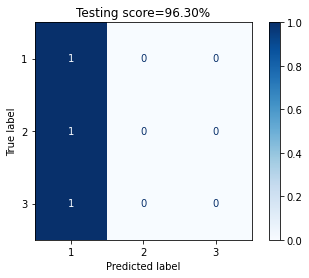

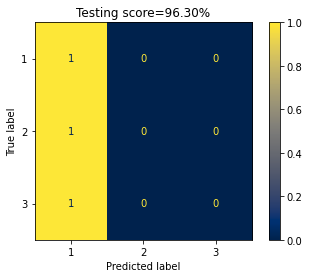

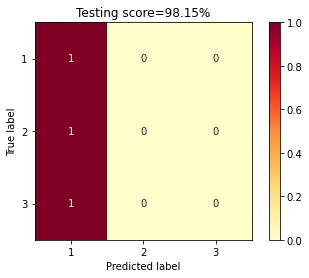

In [76]:
title1='Testing score={:.2f}%'.format(100*clf_original_lbfgs.score(X_test_,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf_original_lbfgs,
X_test,
y_test,
cmap=plt.cm.Blues,
normalize='true',)
disp.ax_.set_title(title1)
plt.show()
title2='Testing score={:.2f}%'.format(100*clf_original_newtoncg.score(X_test_,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf_original_newtoncg,
X_test,
y_test,
cmap=plt.cm.cividis,
normalize='true',)
disp.ax_.set_title(title2)
plt.show()
title3='Testing score={:.2f}%'.format(100*clf_original_liblin.score(X_test_,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf_original_liblin,
X_test,
y_test,
cmap=plt.cm.YlOrRd,
normalize='true',)
disp.ax_.set_title(title3)
plt.show()

<sol\>We can also use confusion matrix to visuaul classification.Above three confusion matrixs,three of algorithms suit for this data. 

## use orginal data to train the support vector machine model

In [55]:
C=1
opts=dict(C=C,tol=1e-6,max_iter=int(1e6))
# opts=dict(C=C,decision_function_shape='ovo',tol=1e-6,max_iter=int(1e6))
clf_svm_linear=SVC(kernel='linear',**opts)
clf_svm_rbf=SVC(kernel='rbf',gamma=0.2,**opts)
clf_svm_poly=SVC(kernel='poly',degree=3,**opts)
# clf_svm=LinearSVC(**opts) #one vs the rest
clf_svm_linear.fit(X_train_,y_train)
predictions=clf_svm_linear.predict(X_test_)
print('accuracy for test data under linear:{:.2f}%'.format(100*clf_svm_linear.score(X_test_,y_test)))
print(classification_report(y_test,predictions))
clf_svm_rbf.fit(X_train_,y_train)
predictions=clf_svm_rbf.predict(X_test_)
print('accuracy for test data under rbf:{:.2f}%'.format(100*clf_svm_rbf.score(X_test_,y_test)))
print(classification_report(y_test,predictions))
clf_svm_poly.fit(X_train_,y_train)
predictions=clf_svm_poly.predict(X_test_)
print('accuracy for test data under poly:{:.2f}%'.format(100*clf_svm_poly.score(X_test_,y_test)))
print(classification_report(y_test,predictions))

accuracy for test data under linear:92.59%
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       0.85      0.94      0.89        18
           3       1.00      0.82      0.90        17

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54

accuracy for test data under rbf:96.30%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.90      1.00      0.95        18
           3       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

accuracy for test data under poly:90.74%
              precision    recall  f1-score   support

           1       1.00      0.84      0.91        19
     

<sol\>Under support vector machine,rbf kernel function have the highest percentage(96.30%).My point is that rbf kernel maps samples to an infinite-dimensional space,so it can easily classify in high dimension.

In [56]:
print(y_test.shape)
print(predictions)
print(y_test)

(54,)
[2 3 3 1 1 3 3 2 2 1 1 1 1 3 2 2 2 2 2 2 3 1 2 1 2 2 2 2 3 3 2 2 3 3 1 2 2
 2 2 1 1 1 1 3 1 3 1 2 1 3 3 3 2 2]
[2 3 3 1 1 3 3 1 2 1 1 1 1 3 2 1 2 3 2 2 3 1 2 1 2 2 3 2 3 3 2 2 3 3 1 2 2
 2 2 1 1 1 1 3 1 3 1 2 1 3 3 3 1 2]


## use orginal data to train the ANN model

In [57]:
# hidden_layers = (512,) # one hidden layer 
# # activation = ’relu’ # the default 
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers, verbose = False, \
        activation = activation, tol = 1e-6, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning 
# solver = ’lbfgs’ # not suitable here #適用連續資料
# solver = 'adam' # default solver #適用類別資料
clf_MLP_adam = MLPClassifier(solver = 'adam', **opts) 
clf_MLP_lbfgs = MLPClassifier(solver = 'lbfgs', **opts) 
clf_MLP_sgd = MLPClassifier(solver = 'sgd', **opts) 
clf_MLP_adam.fit(X_train_, y_train)
predictions = clf_MLP_adam.predict(X_test_)
print('accuracy for test data under adam:{:.2f}%'.format(100*clf_MLP_adam.score(X_test_,y_test)))
print(classification_report(y_test, predictions))
clf_MLP_lbfgs.fit(X_train_, y_train)
predictions = clf_MLP_lbfgs.predict(X_test_)
print('accuracy for test data under lbfgs:{:.2f}%'.format(100*clf_MLP_lbfgs.score(X_test_,y_test)))
print(classification_report(y_test, predictions))
clf_MLP_sgd.fit(X_train_, y_train)
predictions = clf_MLP_sgd.predict(X_test_)
print('accuracy for test data under sgd:{:.2f}%'.format(100*clf_MLP_sgd.score(X_test_,y_test)))
print(classification_report(y_test, predictions))

accuracy for test data under adam:92.59%
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       0.85      0.94      0.89        18
           3       1.00      0.82      0.90        17

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54

accuracy for test data under lbfgs:92.59%
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       0.85      0.94      0.89        18
           3       1.00      0.82      0.90        17

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54

accuracy for test data under sgd:98.15%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
      

<sol\>By contrast,we can notice the sgd algorithm that has best accuracy(98.15%).Beacuse this algorithm add weight in iteration.In my opinion,this is suitable for this condition.

## use principal component analysis DATA to train LOGISTIC REGRESSION model

In [58]:
pca = PCA(n_components = 0.8).fit(X_train_)#n_components = 0.8取80%的能量，或著可以寫成n_components = 10取前十個主成分
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=0) 
clf_PCA_lbfgs = LogisticRegression(solver = 'lbfgs', **opts)#default
clf_PCA_liblin = LogisticRegression(solver = 'liblinear', **opts)
clf_PCA_newtoncg = LogisticRegression(solver = 'newton-cg', **opts)
clf_PCA_lbfgs.fit(Z_train, y_train)
y_pred = clf_PCA_lbfgs.predict(Z_test)
# print(f'{accuracy_score(y_test, y_pred):.2%}\n')
print('accuracy for test data under lbfgs:{:.2f}%'.format(100*clf_PCA_lbfgs.score(Z_test,y_test)))
print(classification_report(y_test, y_pred))
clf_PCA_liblin.fit(Z_train, y_train)
y_pred = clf_PCA_liblin.predict(Z_test)
print('accuracy for test data under liblinear:{:.2f}%'.format(100*clf_PCA_liblin.score(Z_test,y_test)))
print(classification_report(y_test, y_pred))
clf_PCA_newtoncg.fit(Z_train, y_train)
y_pred = clf_PCA_newtoncg.predict(Z_test)
print('accuracy for test data under newtoncg:{:.2f}%'.format(100*clf_PCA_newtoncg.score(Z_test,y_test)))
print(classification_report(y_test, y_pred))

accuracy for test data under lbfgs:96.30%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.90      1.00      0.95        18
           3       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

accuracy for test data under liblinear:98.15%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.95      1.00      0.97        18
           3       1.00      0.94      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

accuracy for test data under newtoncg:96.30%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       

<sol\>Despit the pca method will loss information.But,liblinear algorithm still has highest percentage(98.15%).Not only it use penalty ,but also can handel high-dimensional features.Otherwise,newtoncg and lbfgs are developed by newton method.

## use PCA data to train the support vector machine model

In [59]:
C=1
opts=dict(C=C,tol=1e-6,max_iter=int(1e6))
# opts=dict(C=C,decision_function_shape='ovo',tol=1e-6,max_iter=int(1e6))
clf_svm_pca_linear=SVC(kernel='linear',**opts)
clf_svm_pca_rbf=SVC(kernel='rbf',gamma=0.2,**opts)
clf_svm_pca_poly=SVC(kernel='poly',degree=3,**opts)
# clf_svm=LinearSVC(**opts) #one vs the rest
clf_svm_pca_linear.fit(Z_train,y_train)
predictions=clf_svm_pca_linear.predict(Z_test)
print('accuracy for test data under linear:{:.2f}%'.format(100*clf_svm_pca_linear.score(Z_test,y_test)))
print(classification_report(y_test,predictions))
clf_svm_pca_rbf.fit(Z_train,y_train)
predictions=clf_svm_pca_rbf.predict(Z_test)
print('accuracy for test data under rbf:{:.2f}%'.format(100*clf_svm_pca_rbf.score(Z_test,y_test)))
print(classification_report(y_test,predictions))
clf_svm_pca_poly.fit(Z_train,y_train)
predictions=clf_svm_pca_poly.predict(Z_test)
print('accuracy for test data under poly:{:.2f}%'.format(100*clf_svm_pca_poly.score(Z_test,y_test)))
print(classification_report(y_test,predictions))

accuracy for test data under linear:96.30%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.90      1.00      0.95        18
           3       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

accuracy for test data under rbf:96.30%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.90      1.00      0.95        18
           3       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

accuracy for test data under poly:83.33%
              precision    recall  f1-score   support

           1       1.00      0.79      0.88        19
     

<sol\>After we use pca method,rank of three kernel function is different to original data.As we can seen,data reduction will  influence the rank.Rbf and linear get the first,following poly.Beside,I think that I don't use cross validation to choose paramether 'd',so the parameter 'd' is not suitable for this data. 

## use PCA data to train the ANN model

In [60]:
# hidden_layers = (512,) # one hidden layer 
# # activation = ’relu’ # the default 
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers, verbose = False, \
        activation = activation, tol = 1e-6, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning 
# solver = ’lbfgs’ # not suitable here #suit for continuous data
# solver = 'adam' # default solver #suit for category data
clf_MLP_pca_adam = MLPClassifier(solver = 'adam', **opts) 
clf_MLP_pca_lbfgs = MLPClassifier(solver = 'lbfgs', **opts) 
clf_MLP_pca_sgd = MLPClassifier(solver = 'sgd', **opts) 
clf_MLP_pca_adam.fit(Z_train, y_train)
predictions = clf_MLP_pca_adam.predict(Z_test)
print('accuracy for test data under adam:{:.2f}%'.format(100*clf_MLP_pca_adam.score(Z_test,y_test)))
print(classification_report(y_test, predictions))
clf_MLP_pca_lbfgs.fit(Z_train, y_train)
predictions = clf_MLP_pca_lbfgs.predict(Z_test)
print('accuracy for test data under lbfgs:{:.2f}%'.format(100*clf_MLP_pca_lbfgs.score(Z_test,y_test)))
print(classification_report(y_test, predictions))
clf_MLP_pca_sgd.fit(Z_train, y_train)
predictions = clf_MLP_pca_sgd.predict(Z_test)
print('accuracy for test data under sgd:{:.2f}%'.format(100*clf_MLP_pca_sgd.score(Z_test,y_test)))
print(classification_report(y_test, predictions))

accuracy for test data under adam:98.15%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.95      1.00      0.97        18
           3       1.00      0.94      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

accuracy for test data under lbfgs:96.30%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.90      1.00      0.95        18
           3       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

accuracy for test data under sgd:98.15%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
      

<sol\>In this case,sgd and adam algorithm have highest percentage(98.15%).Because,the Adam algorithm is based on the first-order moment estimate of gradients, also known as momentum, and the second-order moment estimate of gradients.It always presents high accuracy.